In [1]:
import pandas as pd

# Load the Excel file
file_path = 'cleandatatry.xlsx'  
sheet_data = pd.read_excel(file_path)

# Add a new column 'New Category' containing only the first word from the 'Category' column
# Also, clean up trailing commas, periods, or spaces
sheet_data['New Category'] = sheet_data['Category'].str.split().str[0].str.strip(",. ")

# Recheck the unique categories after cleaning
unique_categories = sheet_data['New Category'].unique()
print(f"Unique categories after cleanup: {unique_categories}")

# Group by the 'New Category' column and count the occurrences of each category
top_categories = sheet_data['New Category'].value_counts().head(10)

# Display the top 10 categories
print(top_categories)

# Save the updated dataframe back to a file
sheet_data.to_excel('cleandatatry_updated.xlsx', index=False)

Unique categories after cleanup: ['Caribbean' 'Cafes' 'Diners' 'Thai' 'Mexican' 'Pizza' 'Taiwanese'
 'Indian' 'Delis' 'Korean' 'Sandwiches' 'Vegan' 'Portuguese' 'Coffee'
 'Barbeque' 'Salad' 'Tex-Mex' 'Vegetarian' 'Bagels' 'Noodles' 'Seafood'
 'Burgers' 'Indonesian' 'Greek' 'Middle' 'Sushi' 'African' 'Afghan'
 'Bakeries' 'Steakhouses' 'Scandinavian' 'Japanese' 'Chinese' 'Senegalese'
 'Sports' 'Colleges' 'Breweries' 'Food' 'American' 'Bars' 'Cajun/Creole'
 'Vietnamese' 'Filipino' 'Ethiopian' 'Caterers' 'Salvadoran' 'Peruvian'
 'Breakfast' 'Hot' 'Lounges' 'Spanish' 'Latin' 'Chicken' 'Asian' 'Beer'
 'Buffets' 'Cuban' 'Soul' 'Tapas' 'Southern' 'Mediterranean' 'Fast'
 'Burmese' 'Italian' 'Venezuelan' 'Cocktail' 'Street' 'Dominican'
 'Restaurants' 'Specialty' 'Comfort' 'Pubs' 'Dive' 'New' 'Wine' 'Grocery'
 'Desserts' 'Convenience' 'Gluten-Free' 'Pakistani' 'Himalayan/Nepalese'
 'Soup' 'Dim' 'Performing' 'Music' 'Gastropubs' 'Szechuan' 'Pool'
 'International' 'Cafeteria' 'French' 'Dance']
New 

In [3]:
# Group by the 'New Category' column and count the occurrences of each category
top_categories = sheet_data['New Category'].value_counts().head(10)

# Display the top 10 categories
print(top_categories)

New Category
American      3857
Pizza         3504
Bars          2880
Caribbean     1954
Mexican       1922
Vietnamese    1871
Indian        1853
Breakfast     1801
Chinese       1764
Diners        1571
Name: count, dtype: int64


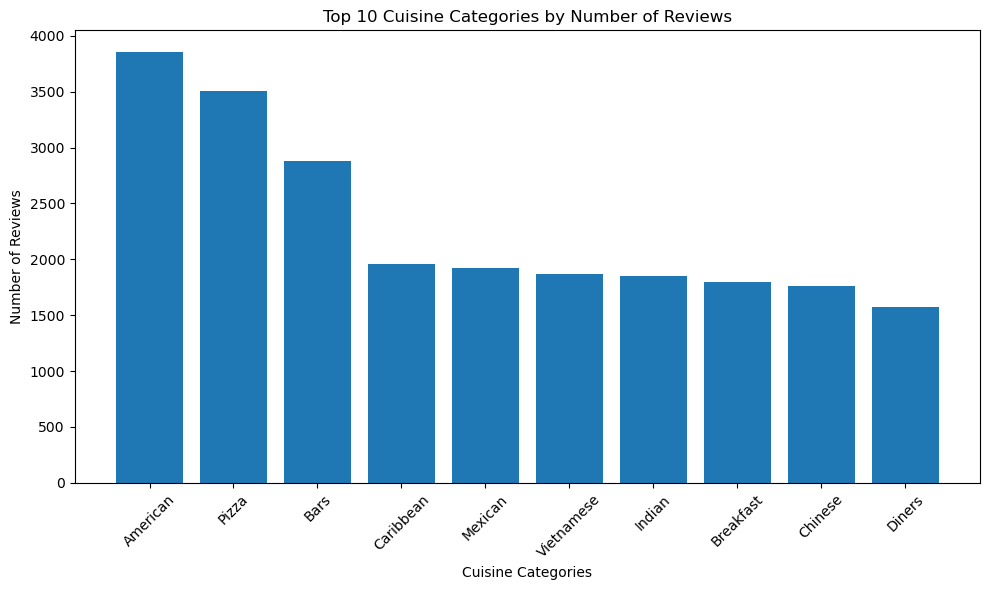

In [5]:
import matplotlib.pyplot as plt

# Prepare data for plotting
top_categories = sheet_data['New Category'].value_counts().head(10)
categories = top_categories.index  # Category names
counts = top_categories.values  # Corresponding counts

# Create a bar chart
plt.figure(figsize=(10, 6))  # Set the figure size
plt.bar(categories, counts)  # Bar chart
plt.xlabel('Cuisine Categories')  # X-axis label
plt.ylabel('Number of Reviews')  # Y-axis label
plt.title('Top 10 Cuisine Categories by Number of Reviews')  # Chart title
plt.xticks(rotation=45)  # Rotate category names for better readability
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Display the chart

Average Ratings by New Category (at least 50 ratings):
New Category
Senegalese       4.507937
Mediterranean    4.336820
Peruvian         4.240664
Filipino         4.209440
Coffee           4.173362
                   ...   
Grocery          3.103448
French           3.056338
Scandinavian     3.000000
Fast             2.763006
Buffets          2.750000
Name: Ratings, Length: 70, dtype: float64


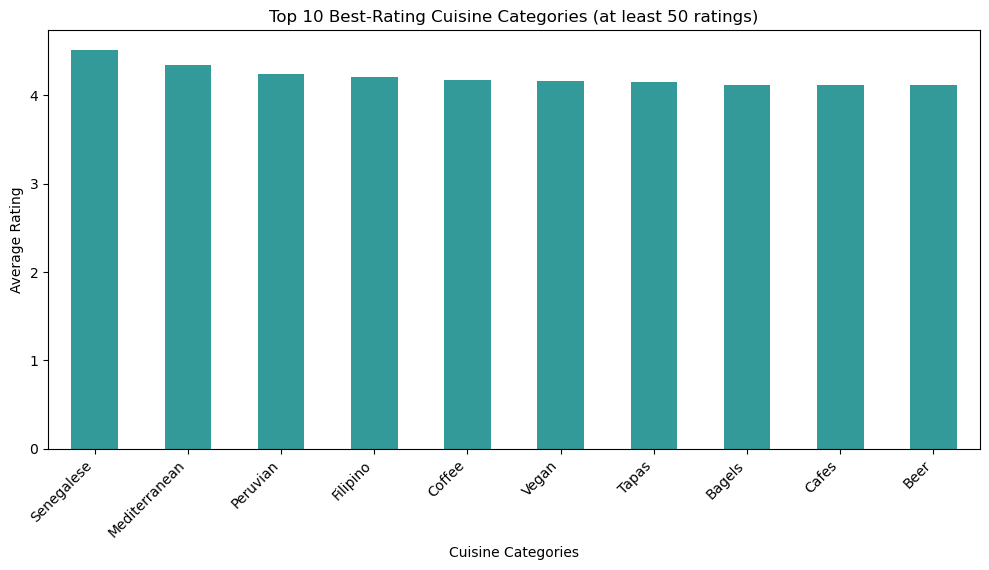

In [66]:
# Step 1: Calculate the total number of ratings per New Category
ratings_count = sheet_data.groupby('New Category')['Ratings'].count()

# Step 2: Filter categories with at least 50 ratings
valid_categories = ratings_count[ratings_count >= 50].index

# Step 3: Calculate the average ratings for valid categories
average_ratings_filtered = (
    sheet_data[sheet_data['New Category'].isin(valid_categories)]
    .groupby('New Category')['Ratings']
    .mean()
    .sort_values(ascending=False)
)

# Display the filtered average ratings
print("Average Ratings by New Category (at least 50 ratings):")
print(average_ratings_filtered)

# Step 4: Visualize the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
average_ratings_filtered.head(10).plot(kind='bar', color='teal', alpha=0.8)
plt.xlabel('Cuisine Categories')
plt.ylabel('Average Rating')
plt.title('Top 10 Best-Rating Cuisine Categories (at least 50 ratings)')
plt.tight_layout()
plt.xticks(rotation=45, ha='right')
plt.show()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/chunyilu/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Top 10 Categories by Sentiment Score (with over 50 ratings):
New Category
Senegalese       0.862262
Tapas            0.861798
Gastropubs       0.831815
Breweries        0.828796
Cocktail         0.818135
Mediterranean    0.816169
Ethiopian        0.809120
Filipino         0.802260
Gluten-Free      0.799462
Coffee           0.793477
Name: Sentiment Score, dtype: float64


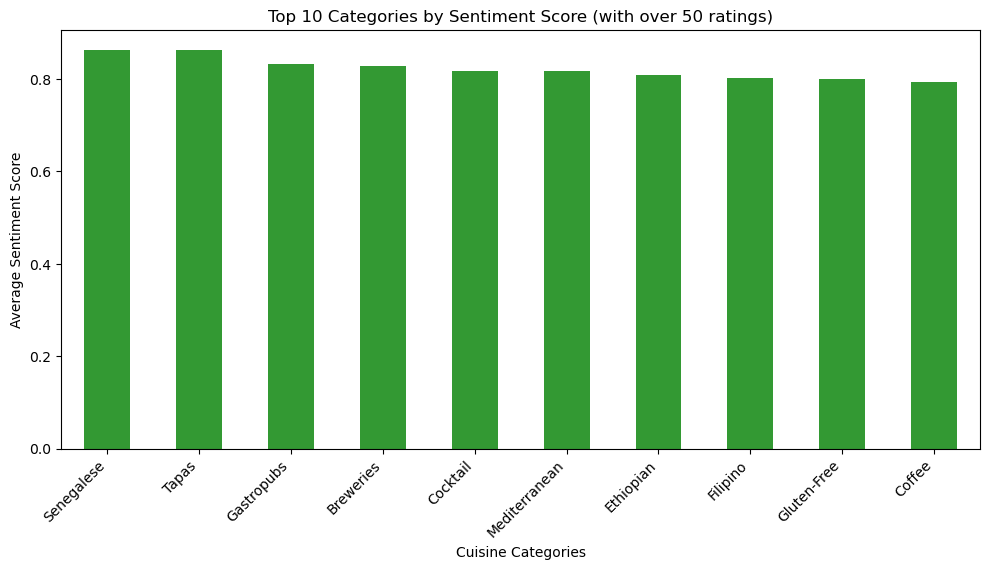

In [13]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import matplotlib.pyplot as plt

# Download VADER Lexicon for sentiment analysis
nltk.download('vader_lexicon')

# Step 1: Initialize VADER Sentiment Analyzer
analyzer = SentimentIntensityAnalyzer()

# Step 2: Perform Sentiment Analysis on Review Content
sheet_data['Sentiment Score'] = sheet_data['Review Content'].dropna().apply(
    lambda x: analyzer.polarity_scores(x)['compound']
)

# Step 3: Filter categories with at least 50 ratings
ratings_count = sheet_data.groupby('New Category')['Ratings'].count()
valid_categories = ratings_count[ratings_count >= 50].index
filtered_data = sheet_data[sheet_data['New Category'].isin(valid_categories)]

# Step 4: Calculate average sentiment score for valid categories
average_sentiment = filtered_data.groupby('New Category')['Sentiment Score'].mean().sort_values(ascending=False)

# Step 5: Extract the top 10 categories with the highest average sentiment
top_10_sentiment_categories = average_sentiment.head(10)

# Display the top 10 sentiment categories
print("Top 10 Categories by Sentiment Score (with over 50 ratings):")
print(top_10_sentiment_categories)

# Step 6: Visualize the top 10 sentiment categories
plt.figure(figsize=(10, 6))
top_10_sentiment_categories.plot(kind='bar', color='green', alpha=0.8)
plt.xlabel('Cuisine Categories')
plt.ylabel('Average Sentiment Score')
plt.title('Top 10 Categories by Sentiment Score (with over 50 ratings)')
plt.tight_layout()
plt.xticks(rotation=45, ha='right')
plt.show()

Top 10 Cuisine Categories by Delivery Mentions:
New Category
Pizza             444
Chinese           349
Thai              208
Japanese/Sushi    132
Indian            107
Sandwiches         72
American           63
Peruvian           62
Caribbean          60
Mexican            56
Name: Is Delivery, dtype: int64


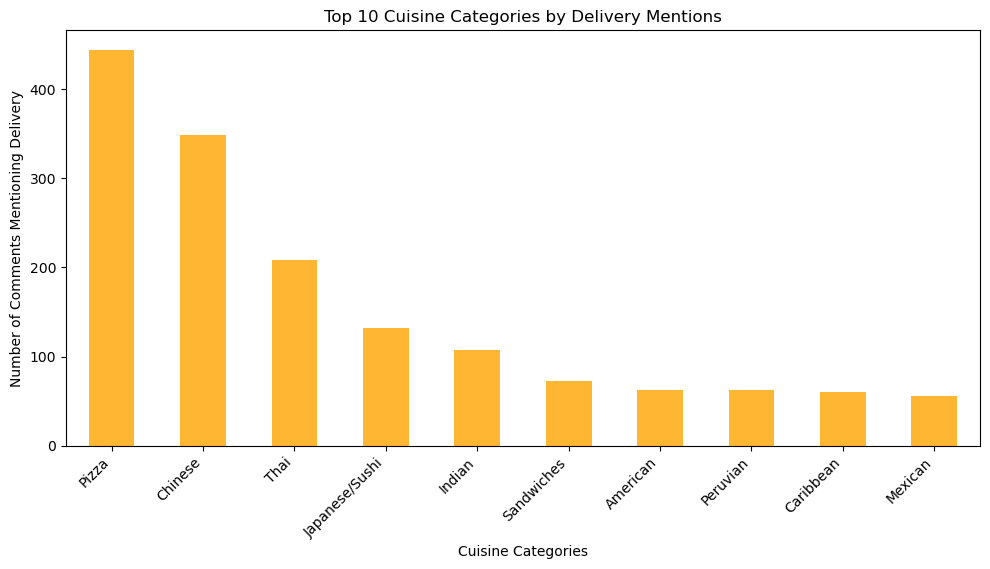

In [41]:
from nltk.stem import PorterStemmer
import pandas as pd

# Initialize the Porter Stemmer
stemmer = PorterStemmer()

# Step 1: Define delivery-related keywords and stem them
delivery_keywords = ['delivery', 'delivered', 'to-go', 'takeout', 'doorstep', 
                     'order online', 'picked up', 'delivering', 'drop-off', 'contactless']
stemmed_keywords = [stemmer.stem(keyword) for keyword in delivery_keywords]

# Step 2: Create a function to check if delivery is mentioned in a review
def mentions_delivery(review):
    if pd.isna(review):  # Handle missing values
        return 0
    review_words = review.lower().split()  # Tokenize the review
    stemmed_review_words = [stemmer.stem(word) for word in review_words]  # Stem each word in the review
    return 1 if any(stemmed_keyword in stemmed_review_words for stemmed_keyword in stemmed_keywords) else 0

# Step 3: Apply the function to create the 'Is Delivery' column
sheet_data['Is Delivery'] = sheet_data['Review Content'].apply(mentions_delivery)

# Step 4: Group by category and count the total number of comments mentioning delivery
delivery_total_mentions = (
    sheet_data.groupby('New Category')['Is Delivery']
    .sum()
    .sort_values(ascending=False)
)

# Step 5: Extract the top 10 categories
top_10_delivery_categories = delivery_total_mentions.head(10)

# Display the top 10 categories
print("Top 10 Cuisine Categories by Delivery Mentions:")
print(top_10_delivery_categories)

# Step 6: Visualize the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
top_10_delivery_categories.plot(kind='bar', color='orange', alpha=0.8)
plt.xlabel('Cuisine Categories')
plt.ylabel('Number of Comments Mentioning Delivery')
plt.title('Top 10 Cuisine Categories by Delivery Mentions')
plt.tight_layout()
plt.xticks(rotation=45, ha='right')
plt.show()

Updated Top 10 Cuisine Categories by Delivery Mentions:
New Category
Pizza             444
Chinese           349
Thai              208
Japanese/Sushi    132
Indian            107
Sandwiches         72
American           63
Peruvian           62
Caribbean          60
Mexican            56
Name: Is Delivery, dtype: int64


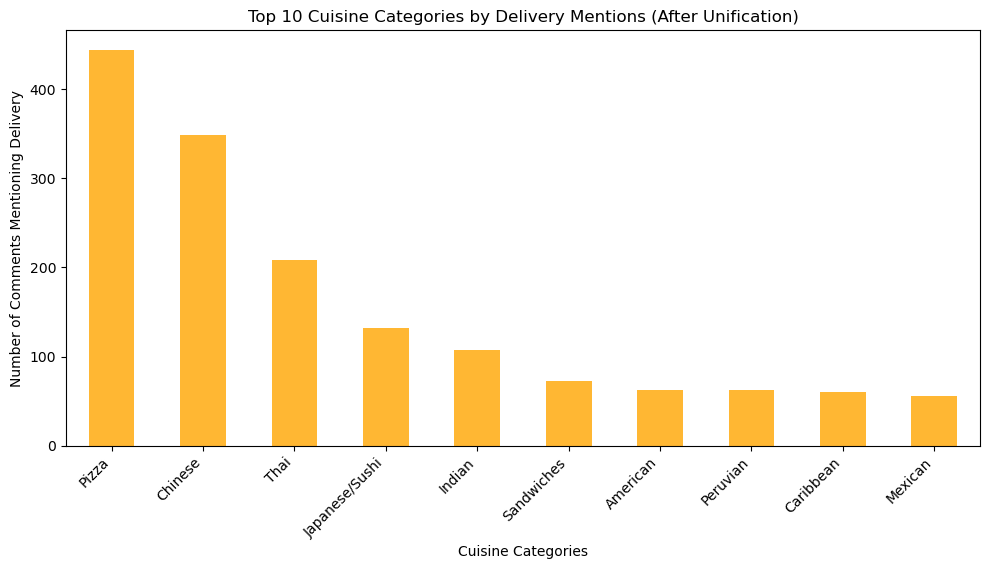

In [47]:
#Combine both Sushi and Japanese
# Combine both Sushi and Japanese into 'Japanese/Sushi'
sheet_data['New Category'] = sheet_data['New Category'].replace({'Japanese': 'Japanese/Sushi', 'Sushi': 'Japanese/Sushi'})

# Recalculate the total number of delivery-related comments after category update
delivery_total_mentions = (
    sheet_data.groupby('New Category')['Is Delivery']
    .sum()
    .sort_values(ascending=False)
)

# Extract the updated top 10 categories
top_10_delivery_categories = delivery_total_mentions.head(10)

# Display the updated top 10 categories
print("Updated Top 10 Cuisine Categories by Delivery Mentions:")
print(top_10_delivery_categories)

# Visualize the updated results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
top_10_delivery_categories.plot(kind='bar', color='orange', alpha=0.8)
plt.xlabel('Cuisine Categories')
plt.ylabel('Number of Comments Mentioning Delivery')
plt.title('Top 10 Cuisine Categories by Delivery Mentions (After Unification)')
plt.tight_layout()
plt.xticks(rotation=45, ha='right')
plt.show()

In [51]:
# Save the dataset with the 'Is Delivery' column included
sheet_data.to_excel('cleandatatry_with_is_delivery_flag.xlsx', index=False)

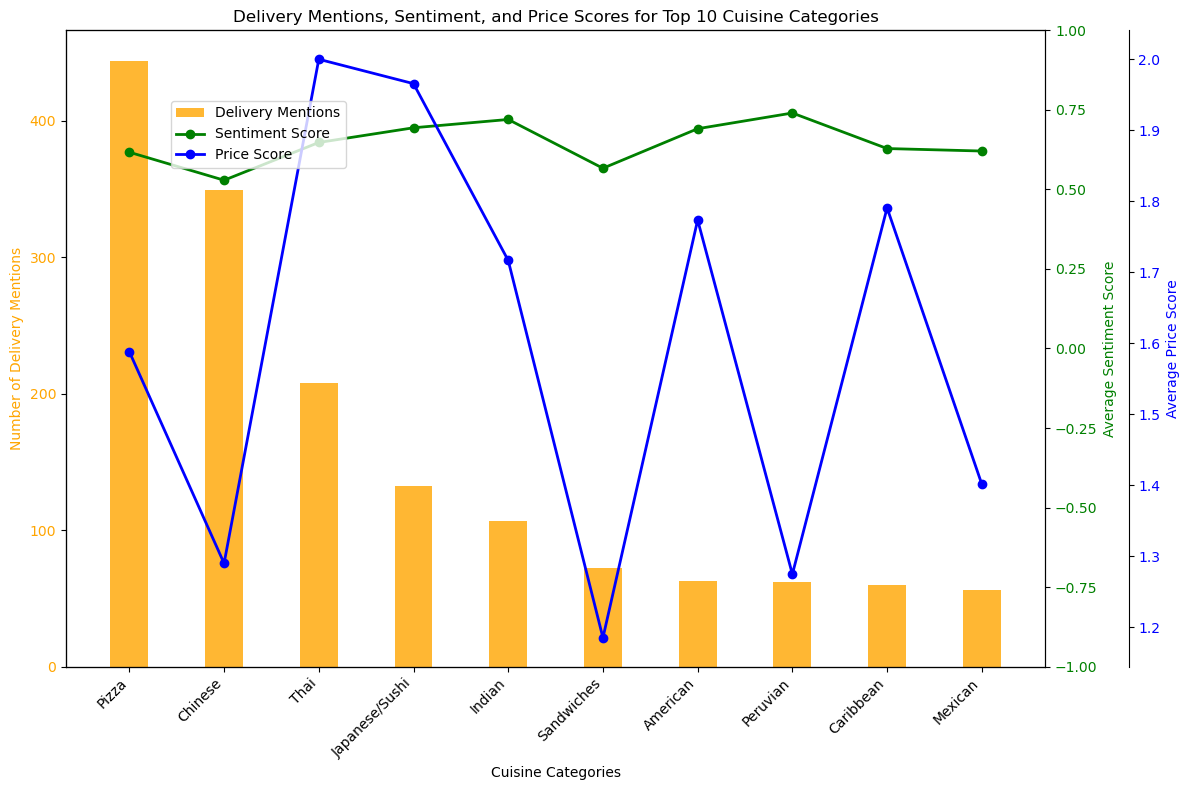

In [49]:
import matplotlib.pyplot as plt
import numpy as np

# Data Preparation
top_categories = top_10_delivery_categories.index

# Extract data for the top 10 categories
delivery_mentions = top_10_delivery_categories
average_sentiment_top = sheet_data[sheet_data['New Category'].isin(top_categories)] \
    .groupby('New Category')['Sentiment Score'].mean()
sheet_data['Price Score'] = sheet_data['Price'].str.count(r'\$')  # Ensure Price Score is calculated
average_price_top = sheet_data[sheet_data['New Category'].isin(top_categories)] \
    .groupby('New Category')['Price Score'].mean()

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 8))

# Bar chart for delivery mentions
bar_width = 0.4
bar_positions = np.arange(len(top_categories))
ax1.bar(bar_positions, delivery_mentions.values, bar_width, color='orange', alpha=0.8, label='Delivery Mentions')
ax1.set_xlabel('Cuisine Categories')
ax1.set_ylabel('Number of Delivery Mentions', color='orange')
ax1.tick_params(axis='y', labelcolor='orange')
ax1.set_xticks(bar_positions)
ax1.set_xticklabels(top_categories, rotation=45, ha='right')

# Add a second y-axis for sentiment scores
ax2 = ax1.twinx()
ax2.plot(bar_positions, average_sentiment_top[top_categories], color='green', label='Sentiment Score', marker='o', linewidth=2)
ax2.set_ylabel('Average Sentiment Score', color='green')
ax2.tick_params(axis='y', labelcolor='green')
ax2.set_ylim(-1, 1)  # Sentiment scores range from -1 to 1

# Add a third y-axis for price scores
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # Create a third y-axis
ax3.plot(bar_positions, average_price_top[top_categories], color='blue', label='Price Score', marker='o', linewidth=2)
ax3.set_ylabel('Average Price Score', color='blue')
ax3.tick_params(axis='y', labelcolor='blue')

# Title and legend
plt.title('Delivery Mentions, Sentiment, and Price Scores for Top 10 Cuisine Categories')
fig.tight_layout()
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9), bbox_transform=ax1.transAxes)

plt.show()

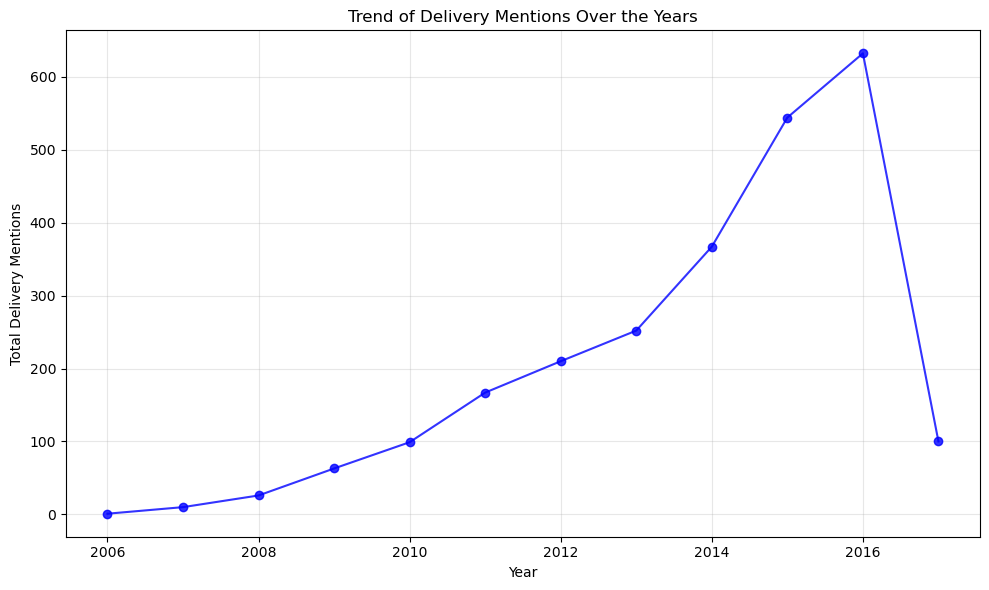

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your updated dataset
file_path = 'cleandatatry_with_is_delivery_flag.xlsx'  # Replace with your file path
sheet_data = pd.read_excel(file_path)

# Step 1: Extract the year from the 'Date' column
sheet_data['Year'] = pd.to_datetime(sheet_data['Date'], errors='coerce').dt.year

# Step 2: Group by year and calculate total delivery mentions
delivery_trend_by_year = (
    sheet_data[sheet_data['Is Delivery'] == 1]
    .groupby('Year')['Is Delivery']
    .sum()
)

# Step 3: Visualize the delivery trend over the years
plt.figure(figsize=(10, 6))
delivery_trend_by_year.plot(kind='line', marker='o', color='blue', alpha=0.8)
plt.xlabel('Year')
plt.ylabel('Total Delivery Mentions')
plt.title('Trend of Delivery Mentions Over the Years')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

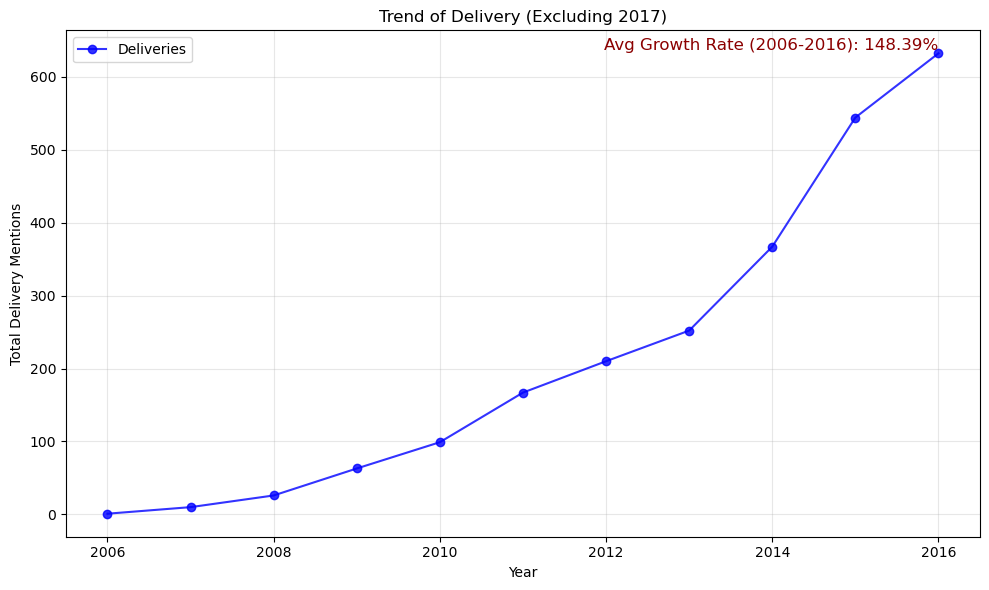

Average Growth Rate (2006-2016): 148.39%


In [93]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
file_path = 'cleandatatry_with_is_delivery_flag.xlsx'  # Replace with your file path
sheet_data = pd.read_excel(file_path)

# Step 1: Extract the year from the 'Date' column
sheet_data['Year'] = pd.to_datetime(sheet_data['Date'], errors='coerce').dt.year

# Step 2: Group by year and calculate total delivery mentions
delivery_trend_by_year = (
    sheet_data[sheet_data['Is Delivery'] == 1]
    .groupby('Year')['Is Delivery']
    .sum()
)

# Step 3: Filter out the year 2017
filtered_delivery_trend = delivery_trend_by_year[delivery_trend_by_year.index <= 2016]

# Step 4: Calculate yearly growth rate
yearly_growth_rate = filtered_delivery_trend.pct_change() * 100  # Percentage change year-over-year
average_growth_rate = yearly_growth_rate.mean()  # Calculate the average growth rate

# Step 5: Plot the delivery trend
plt.figure(figsize=(10, 6))
filtered_delivery_trend.plot(kind='line', marker='o', color='blue', alpha=0.8, label='Deliveries')
plt.xlabel('Year')
plt.ylabel('Total Delivery Mentions')
plt.title('Trend of Delivery (Excluding 2017)')

# Add the average growth rate annotation
start_year = filtered_delivery_trend.index.min()
end_year = filtered_delivery_trend.index.max()
plt.text(
    end_year, filtered_delivery_trend.max(),
    f"Avg Growth Rate ({start_year}-{end_year}): {average_growth_rate:.2f}%",
    fontsize=12, color='darkred', ha='right', va='bottom'
)

# Add grid and show the chart
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# Print the average growth rate in the console
print(f"Average Growth Rate ({start_year}-{end_year}): {average_growth_rate:.2f}%")

<Figure size 1200x800 with 0 Axes>

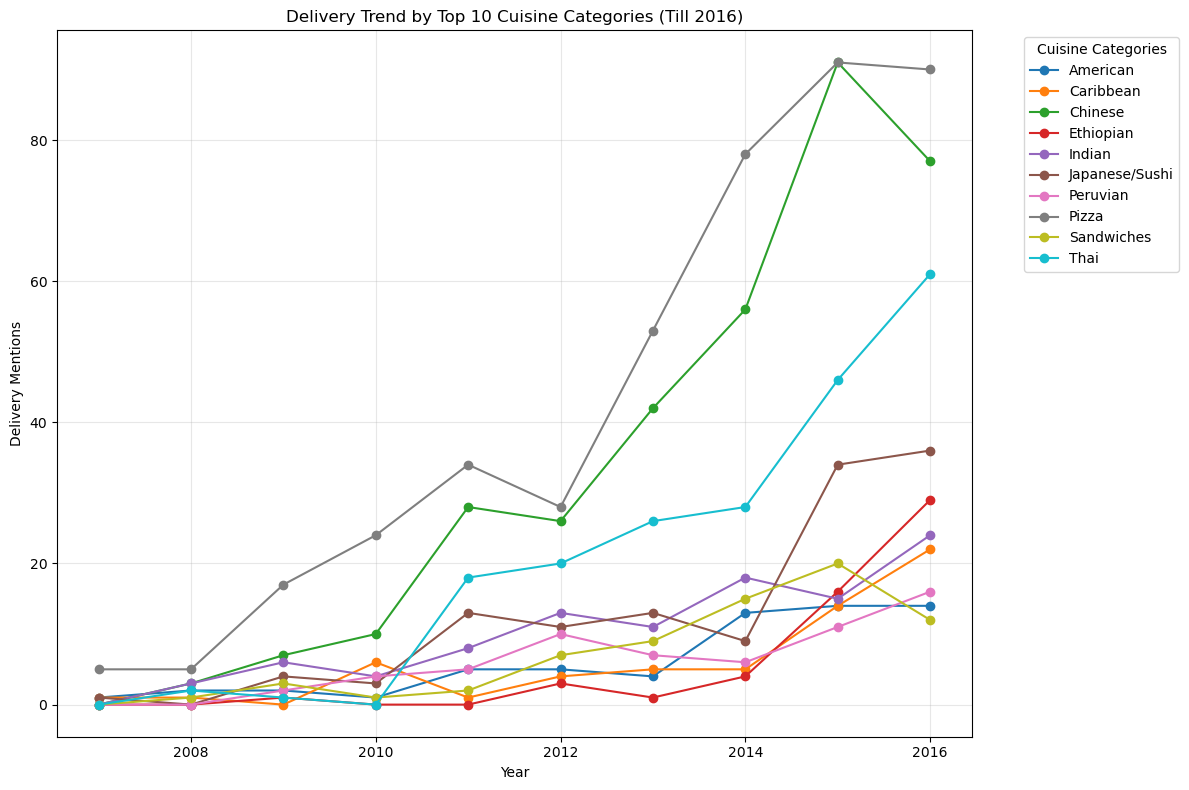

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
file_path = 'cleandatatry_with_is_delivery_flag.xlsx'  # Replace with your file path
sheet_data = pd.read_excel(file_path)

# Extract the year from the 'Date' column
sheet_data['Year'] = pd.to_datetime(sheet_data['Date'], errors='coerce').dt.year

# Step 1: Filter data to exclude the year 2017
filtered_data = sheet_data[sheet_data['Year'] <= 2016]

# Step 2: Identify the top 10 categories by total delivery counts
top_categories = (
    filtered_data[filtered_data['Is Delivery'] == 1]
    .groupby('New Category')['Is Delivery']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)

# Step 3: Filter the data for only the top 10 categories
top_category_data = filtered_data[filtered_data['New Category'].isin(top_categories)]

# Step 4: Group by year and category to calculate delivery counts
trend_data = (
    top_category_data[top_category_data['Is Delivery'] == 1]
    .groupby(['Year', 'New Category'])['Is Delivery']
    .sum()
    .unstack('New Category', fill_value=0)
)

# Step 5: Visualize the trend for each top category
plt.figure(figsize=(12, 8))
trend_data.plot(kind='line', marker='o', figsize=(12, 8))
plt.xlabel('Year')
plt.ylabel('Delivery Mentions')
plt.title('Delivery Trend by Top 10 Cuisine Categories (Till 2016)')
plt.legend(title='Cuisine Categories', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

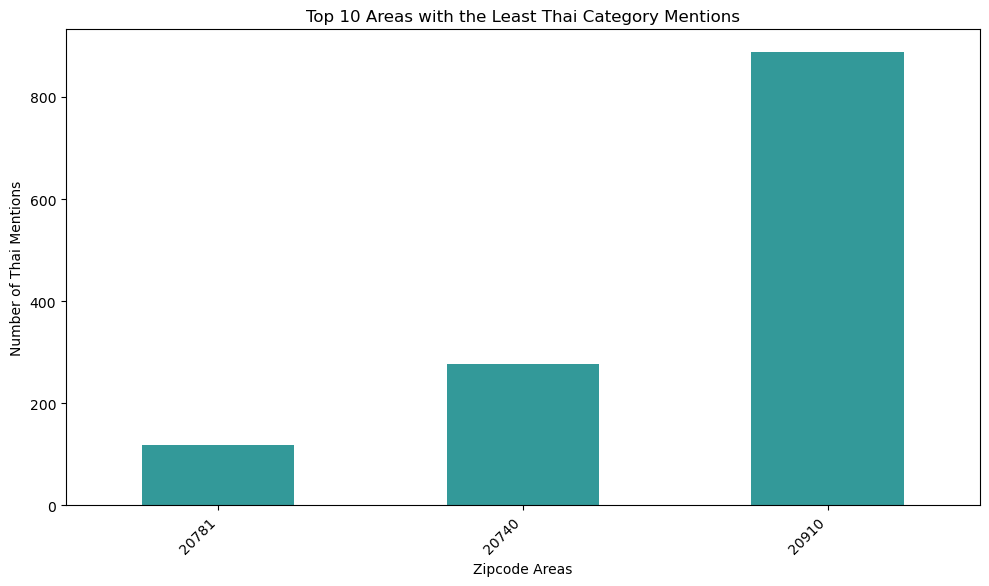

IndexError: index 0 is out of bounds for axis 0 with size 0

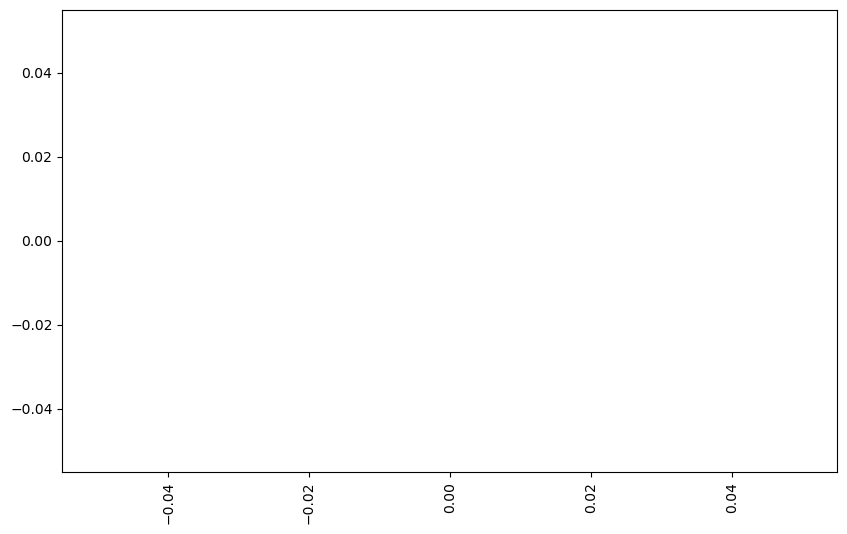

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Extract zip codes from the address
sheet_data['Zipcode'] = sheet_data['Address'].str.extract(r'(\d{5})')  # Extract the 5-digit zip code

# Step 2: Filter data for Thai and Japanese categories
thai_data = sheet_data[sheet_data['New Category'] == 'Thai']
japanese_data = sheet_data[sheet_data['New Category'] == 'Japanese']

# Step 3: Count the number of Thai and Japanese reviews by zip code
thai_zip_counts = thai_data['Zipcode'].value_counts().sort_values()
japanese_zip_counts = japanese_data['Zipcode'].value_counts().sort_values()

# Step 4: Extract the top 10 areas with the least Thai and Japanese mentions
least_thai_zip = thai_zip_counts.head(10)
least_japanese_zip = japanese_zip_counts.head(10)

# Step 5: Plot the results
# Chart for least Thai categories
plt.figure(figsize=(10, 6))
least_thai_zip.plot(kind='bar', color='teal', alpha=0.8)
plt.xlabel('Zipcode Areas')
plt.ylabel('Number of Thai Mentions')
plt.title('Top 10 Areas with the Least Thai Category Mentions')
plt.tight_layout()
plt.xticks(rotation=45, ha='right')
plt.show()

# Chart for least Japanese categories
plt.figure(figsize=(10, 6))
least_japanese_zip.plot(kind='bar', color='purple', alpha=0.8)
plt.xlabel('Zipcode Areas')
plt.ylabel('Number of Japanese Mentions')
plt.title('Top 10 Areas with the Least Japanese Category Mentions')
plt.tight_layout()
plt.xticks(rotation=45, ha='right')
plt.show()

In [19]:
# Filter rows for Thai category and display the first few rows
thai_data = sheet_data[sheet_data['New Category'] == 'Thai']
print(thai_data[['Address', 'Zipcode', 'Review Content']].head())

# Check the number of unique zip codes
print(f"Number of unique zip codes for Thai: {thai_data['Zipcode'].nunique()}")

                                      Address Zipcode  \
540  4511 College Ave, College Park, MD 20740   20740   
541  4511 College Ave, College Park, MD 20740   20740   
542  4511 College Ave, College Park, MD 20740   20740   
543  4511 College Ave, College Park, MD 20740   20740   
544  4511 College Ave, College Park, MD 20740   20740   

                                        Review Content  
540  Ive come in to this location ??twice. And Ive ...  
541  Extremely small place! I recommend going with ...  
542  First time, I thought that it was a really sma...  
543  Ordered Pad Thai to go and I thought it was pr...  
544  This is my favorite Thai restaurant. The Pad K...  
Number of unique zip codes for Thai: 3


In [55]:
# Find the latest date in the 'Date' column
latest_date = pd.to_datetime(sheet_data['Date'], errors='coerce').max()

# Print the latest date
print("The latest date in the dataset is:", latest_date)

The latest date in the dataset is: 2017-03-05 00:00:00


Top 10 Zip Codes for Thai Cuisine (by number of comments):
Zip Code
20910    888
20740    278
20781    118
dtype: int64


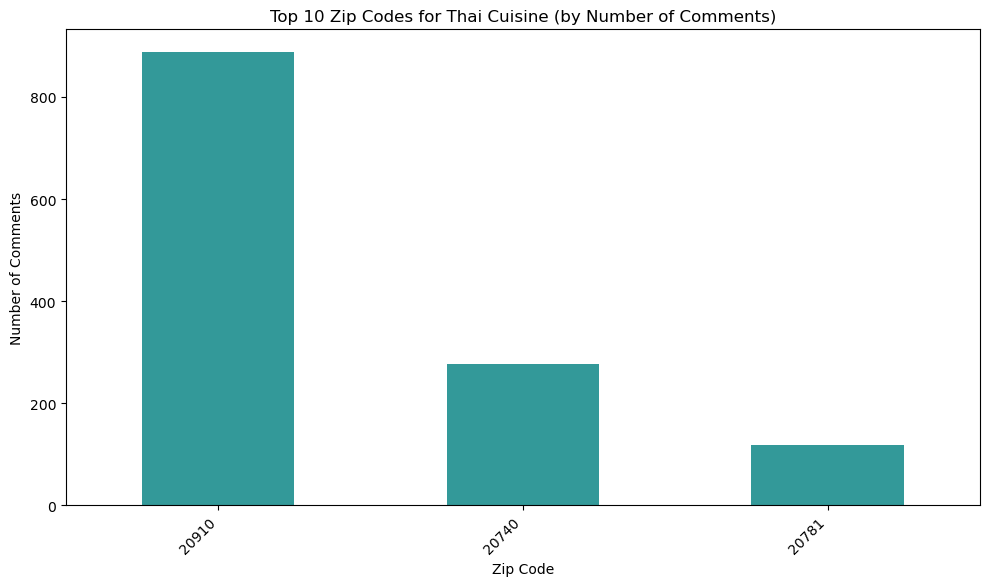

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
file_path = 'cleandatatry_with_is_delivery_flag.xlsx'  # Replace with your file path
sheet_data = pd.read_excel(file_path)

# Step 1: Extract the zip code from the 'Address' column
sheet_data['Zip Code'] = sheet_data['Address'].str.extract(r'(\d{5})')  # Extract 5-digit zip codes

# Step 2: Filter data for 'Thai' category
thai_data = sheet_data[sheet_data['New Category'] == 'Thai']

# Step 3: Group by zip code and count the number of comments
thai_zip_counts = (
    thai_data.groupby('Zip Code')
    .size()
    .sort_values(ascending=False)
    .head(10)
)

# Step 4: Display the results
print("Top 10 Zip Codes for Thai Cuisine (by number of comments):")
print(thai_zip_counts)

# Step 5: Visualize the results
plt.figure(figsize=(10, 6))
thai_zip_counts.plot(kind='bar', color='teal', alpha=0.8)
plt.xlabel('Zip Code')
plt.ylabel('Number of Comments')
plt.title('Top 10 Zip Codes for Thai Cuisine (by Number of Comments)')
plt.tight_layout()
plt.xticks(rotation=45, ha='right')
plt.show()

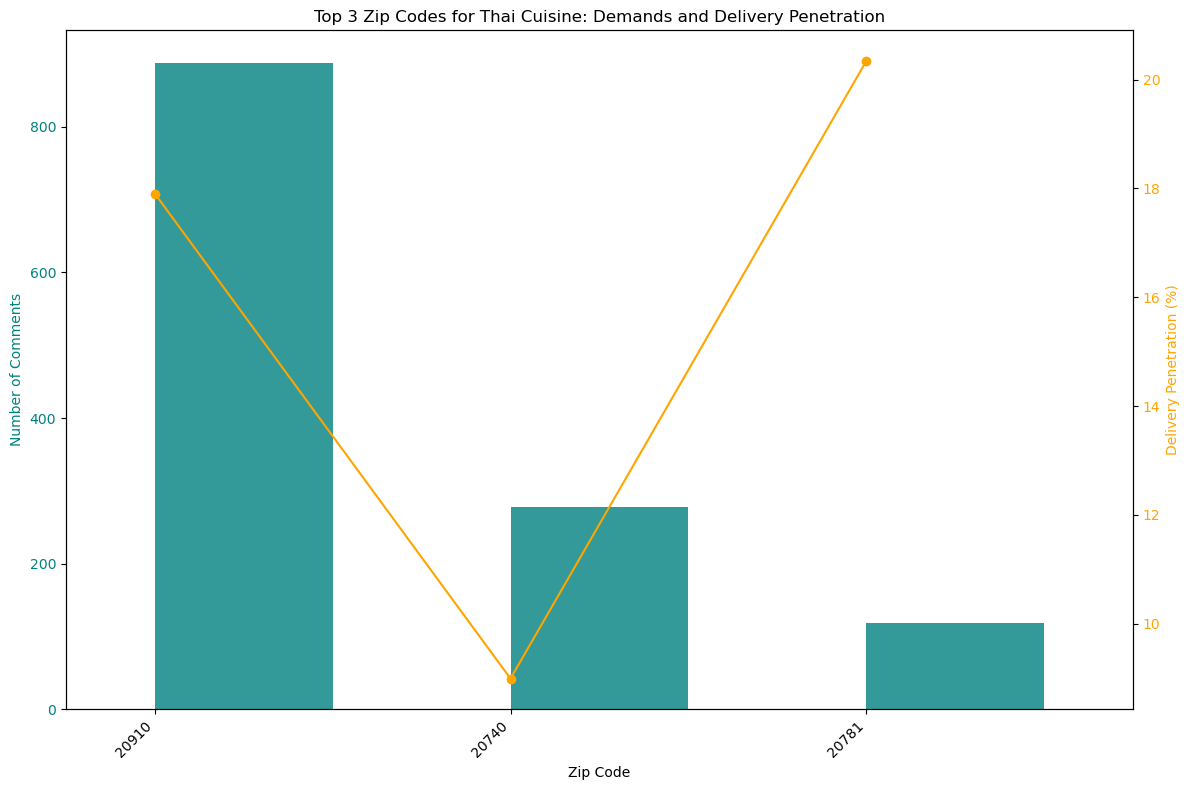

In [79]:
#Add delivery penetration

# Step 1: Count delivery mentions and total comments by zip code for Thai
thai_delivery_counts = thai_data[thai_data['Is Delivery'] == 1].groupby('Zip Code').size()
thai_total_counts = thai_data.groupby('Zip Code').size()

# Step 2: Calculate delivery penetration as a percentage
thai_delivery_penetration = (thai_delivery_counts / thai_total_counts * 100).fillna(0)

# Step 3: Filter for the top 10 zip codes for Thai cuisine by total comments
top_thai_zip_codes = thai_zip_counts.index
thai_delivery_penetration = thai_delivery_penetration.loc[top_thai_zip_codes]

# Step 4: Visualize bar and line chart together
fig, ax1 = plt.subplots(figsize=(12, 8))

# Bar chart for total comments
thai_zip_counts.plot(kind='bar', color='teal', alpha=0.8, ax=ax1, position=0)
ax1.set_xlabel('Zip Code')
ax1.set_ylabel('Number of Comments', color='teal')
ax1.tick_params(axis='y', labelcolor='teal')
ax1.set_xticklabels(top_thai_zip_codes, rotation=45, ha='right')

# Line chart for delivery penetration
ax2 = ax1.twinx()
thai_delivery_penetration.plot(kind='line', marker='o', color='orange', ax=ax2)
ax2.set_ylabel('Delivery Penetration (%)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Title and layout
plt.title('Top 3 Zip Codes for Thai Cuisine: Demands and Delivery Penetration')
plt.tight_layout()
plt.show()

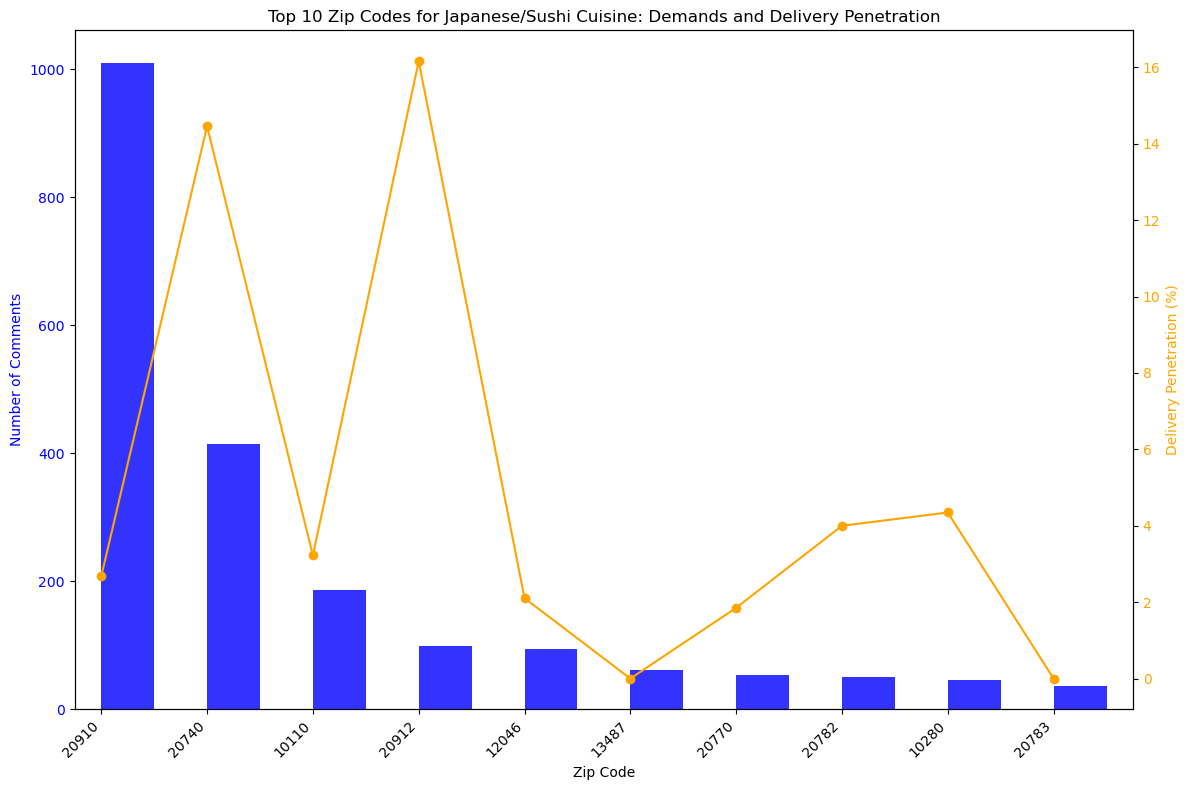

In [81]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
file_path = 'cleandatatry_with_is_delivery_flag.xlsx'  # Replace with your file path
sheet_data = pd.read_excel(file_path)

# Step 1: Extract the zip code from the 'Address' column
sheet_data['Zip Code'] = sheet_data['Address'].str.extract(r'(\d{5})')  # Extract 5-digit zip codes

# Step 2: Filter data for 'Japanese/Sushi' category
japanese_sushi_data = sheet_data[sheet_data['New Category'] == 'Japanese/Sushi']

# Step 3: Group by zip code and calculate total comments and delivery mentions
japanese_sushi_delivery_counts = japanese_sushi_data[japanese_sushi_data['Is Delivery'] == 1].groupby('Zip Code').size()
japanese_sushi_total_counts = japanese_sushi_data.groupby('Zip Code').size()

# Step 4: Calculate delivery penetration as a percentage
japanese_sushi_delivery_penetration = (japanese_sushi_delivery_counts / japanese_sushi_total_counts * 100).fillna(0)

# Step 5: Identify the top 10 zip codes for 'Japanese/Sushi' by total comments
japanese_sushi_zip_counts = (
    japanese_sushi_data.groupby('Zip Code')
    .size()
    .sort_values(ascending=False)
    .head(10)
)
top_japanese_sushi_zip_codes = japanese_sushi_zip_counts.index
japanese_sushi_delivery_penetration = japanese_sushi_delivery_penetration.loc[top_japanese_sushi_zip_codes]

# Step 6: Visualize bar and line chart together
fig, ax1 = plt.subplots(figsize=(12, 8))

# Bar chart for total comments
japanese_sushi_zip_counts.plot(kind='bar', color='blue', alpha=0.8, ax=ax1, position=0)
ax1.set_xlabel('Zip Code')
ax1.set_ylabel('Number of Comments', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticklabels(top_japanese_sushi_zip_codes, rotation=45, ha='right')

# Line chart for delivery penetration
ax2 = ax1.twinx()
japanese_sushi_delivery_penetration.plot(kind='line', marker='o', color='orange', ax=ax2)
ax2.set_ylabel('Delivery Penetration (%)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Title and layout
plt.title('Top 10 Zip Codes for Japanese/Sushi Cuisine: Demands and Delivery Penetration')
plt.tight_layout()
plt.show()